[INFO] Basic information about dataset
[INFO] ================================================================================
[INFO] Top correlated features with malignancy
[INFO] 
Concave points (worst)    0.793566
Perimeter (worst)         0.782914
Concave points (mean)     0.776614
Radius (worst)            0.776454
Perimeter (mean)          0.742636
[INFO] ================================================================================
[INFO] Least correlated features with malignancy
[INFO] 
Fractal dimension (se)      0.077972
Symmetry (se)              -0.006522
Texture (se)               -0.008303
Fractal dimension (mean)   -0.012838
Smoothness (se)            -0.067016
[INFO] ================================================================================
[INFO] Dropping 10 redundant features due to high correlation:
[INFO] ['Area (mean)', 'Area (se)', 'Area (worst)', 'Concave points (mean)', 'Concavity (mean)', 'Perimeter (mean)', 'Perimeter (se)', 'Radius (mean)', 'Radius (w

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   Radius (mean)              569 non-null    float64
 3   Texture (mean)             569 non-null    float64
 4   Perimeter (mean)           569 non-null    float64
 5   Area (mean)                569 non-null    float64
 6   Smoothness (mean)          569 non-null    float64
 7   Compactness (mean)         569 non-null    float64
 8   Concavity (mean)           569 non-null    float64
 9   Concave points (mean)      569 non-null    float64
 10  Symmetry (mean)            569 non-null    float64
 11  Fractal dimension (mean)   569 non-null    float64
 12  Radius (se)                569 non-null    float64
 13  Texture (se)               569 non-null    float64

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


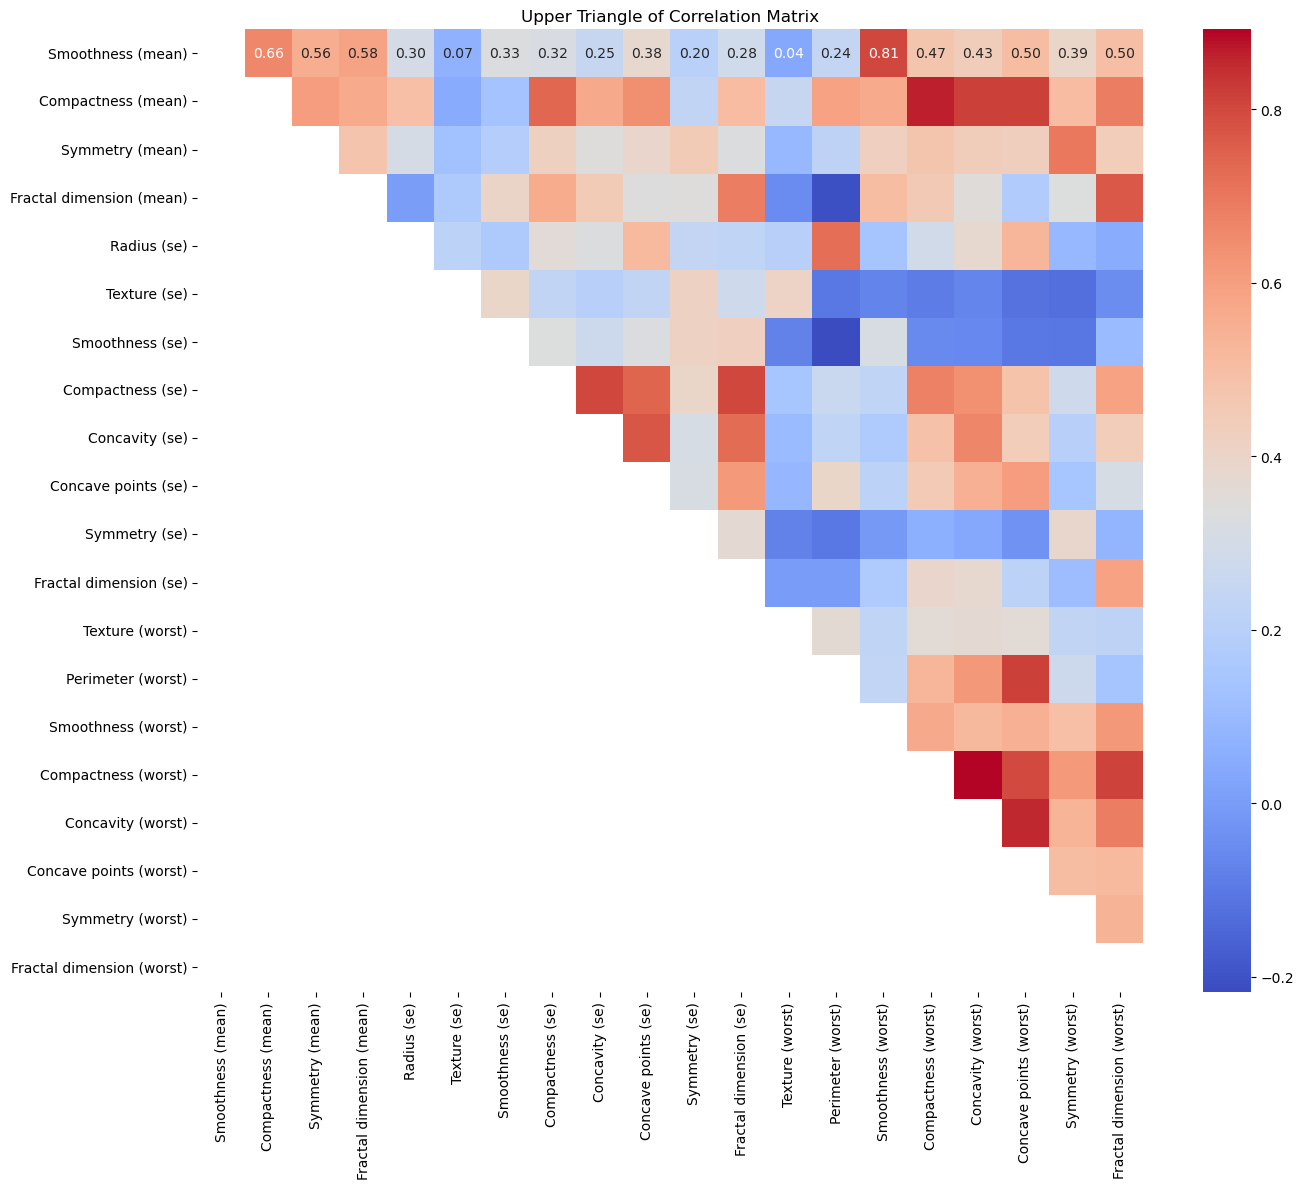

[INFO] Logistic Regression training complete. Best params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
[INFO] Classification Report:
[INFO] 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[INFO] ROC AUC Score: 0.9957
[INFO] Top Features by Logistic Regression Importance:
[INFO] 
Perimeter (worst)         4.114922
Radius (se)               2.971675
Concave points (worst)    1.938010
Texture (worst)           1.516346
Concavity (worst)         0.947258
dtype: float64


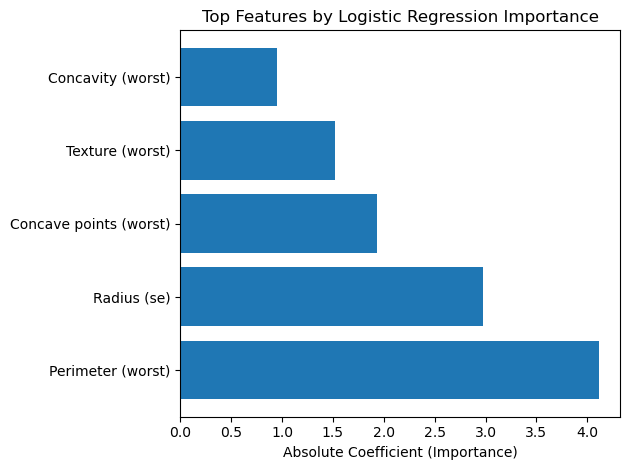

[INFO] Top features by permutation importance / logistic regression:
[INFO] 
Perimeter (worst)         0.135965
Radius (se)               0.066667
Concave points (worst)    0.035088
Texture (worst)           0.020175
Concavity (worst)         0.007895
dtype: float64


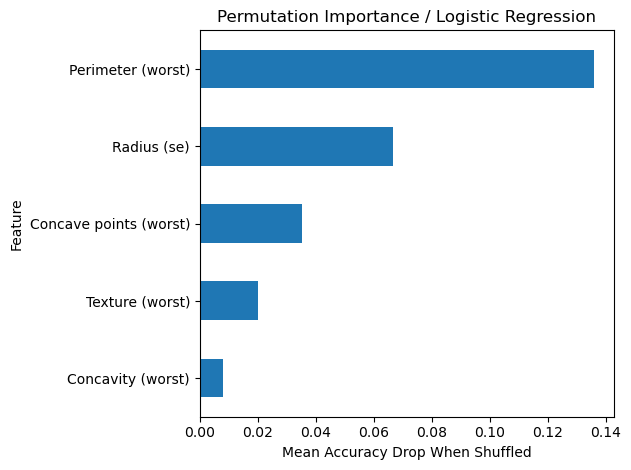

[INFO] Top features by Random Forest importance:
[INFO] 
Concave points (worst)    0.273237
Perimeter (worst)         0.232585
Concavity (worst)         0.110056
Radius (se)               0.068218
Compactness (worst)       0.044066
dtype: float64


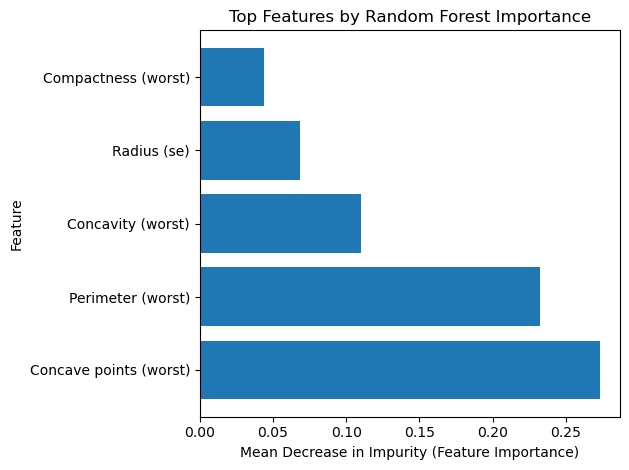

[INFO] Top features by permutation importance / random forest:
[INFO] 
Perimeter (worst)         0.071930
Radius (se)               0.022807
Concave points (worst)    0.017544
Concavity (worst)         0.015789
Texture (worst)           0.012281
dtype: float64


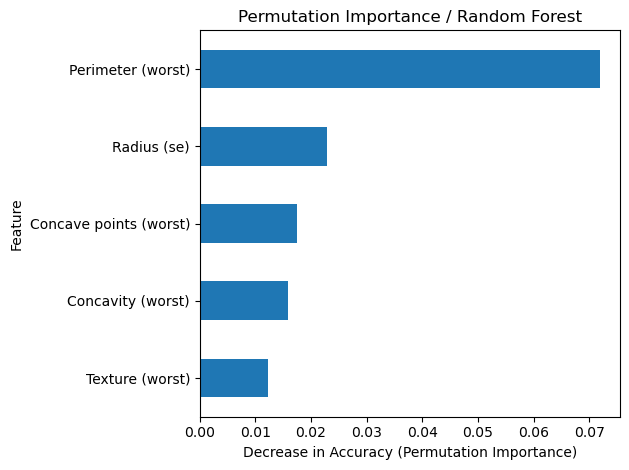

[INFO] Top 5 Feature Importance Comparison:
[INFO] 
                        Logistic Coef  Logistic Permutation  RF Importance  \
Perimeter (worst)                 1.0                   1.0            2.0   
Radius (se)                       2.0                   2.0            4.0   
Concave points (worst)            3.0                   3.0            1.0   
Texture (worst)                   4.0                   4.0            NaN   
Concavity (worst)                 5.0                   5.0            3.0   
Compactness (worst)               NaN                   NaN            5.0   

                        RF Permutation  
Perimeter (worst)                  1.0  
Radius (se)                        2.0  
Concave points (worst)             3.0  
Texture (worst)                    5.0  
Concavity (worst)                  4.0  
Compactness (worst)                NaN  


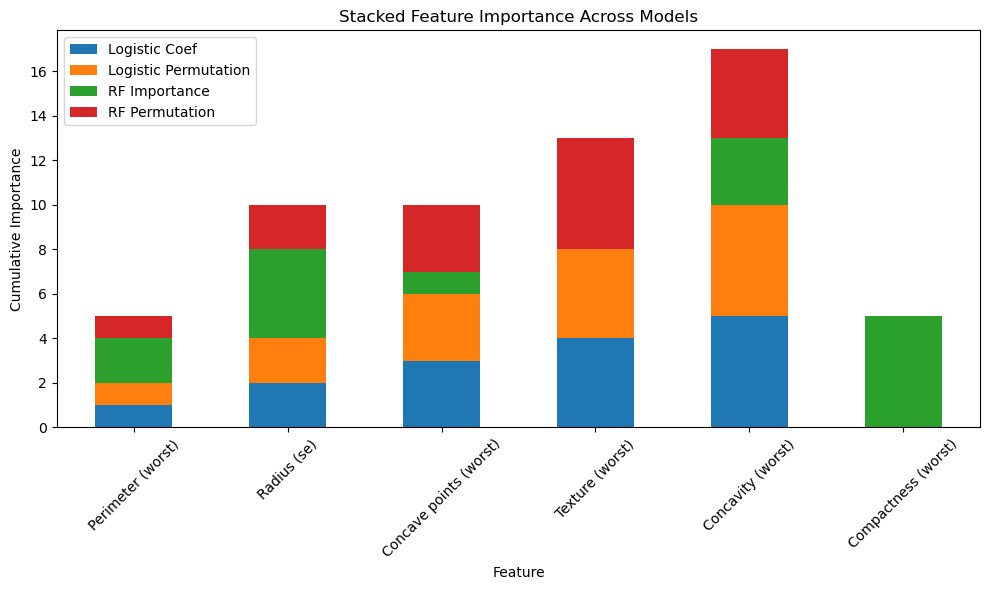

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

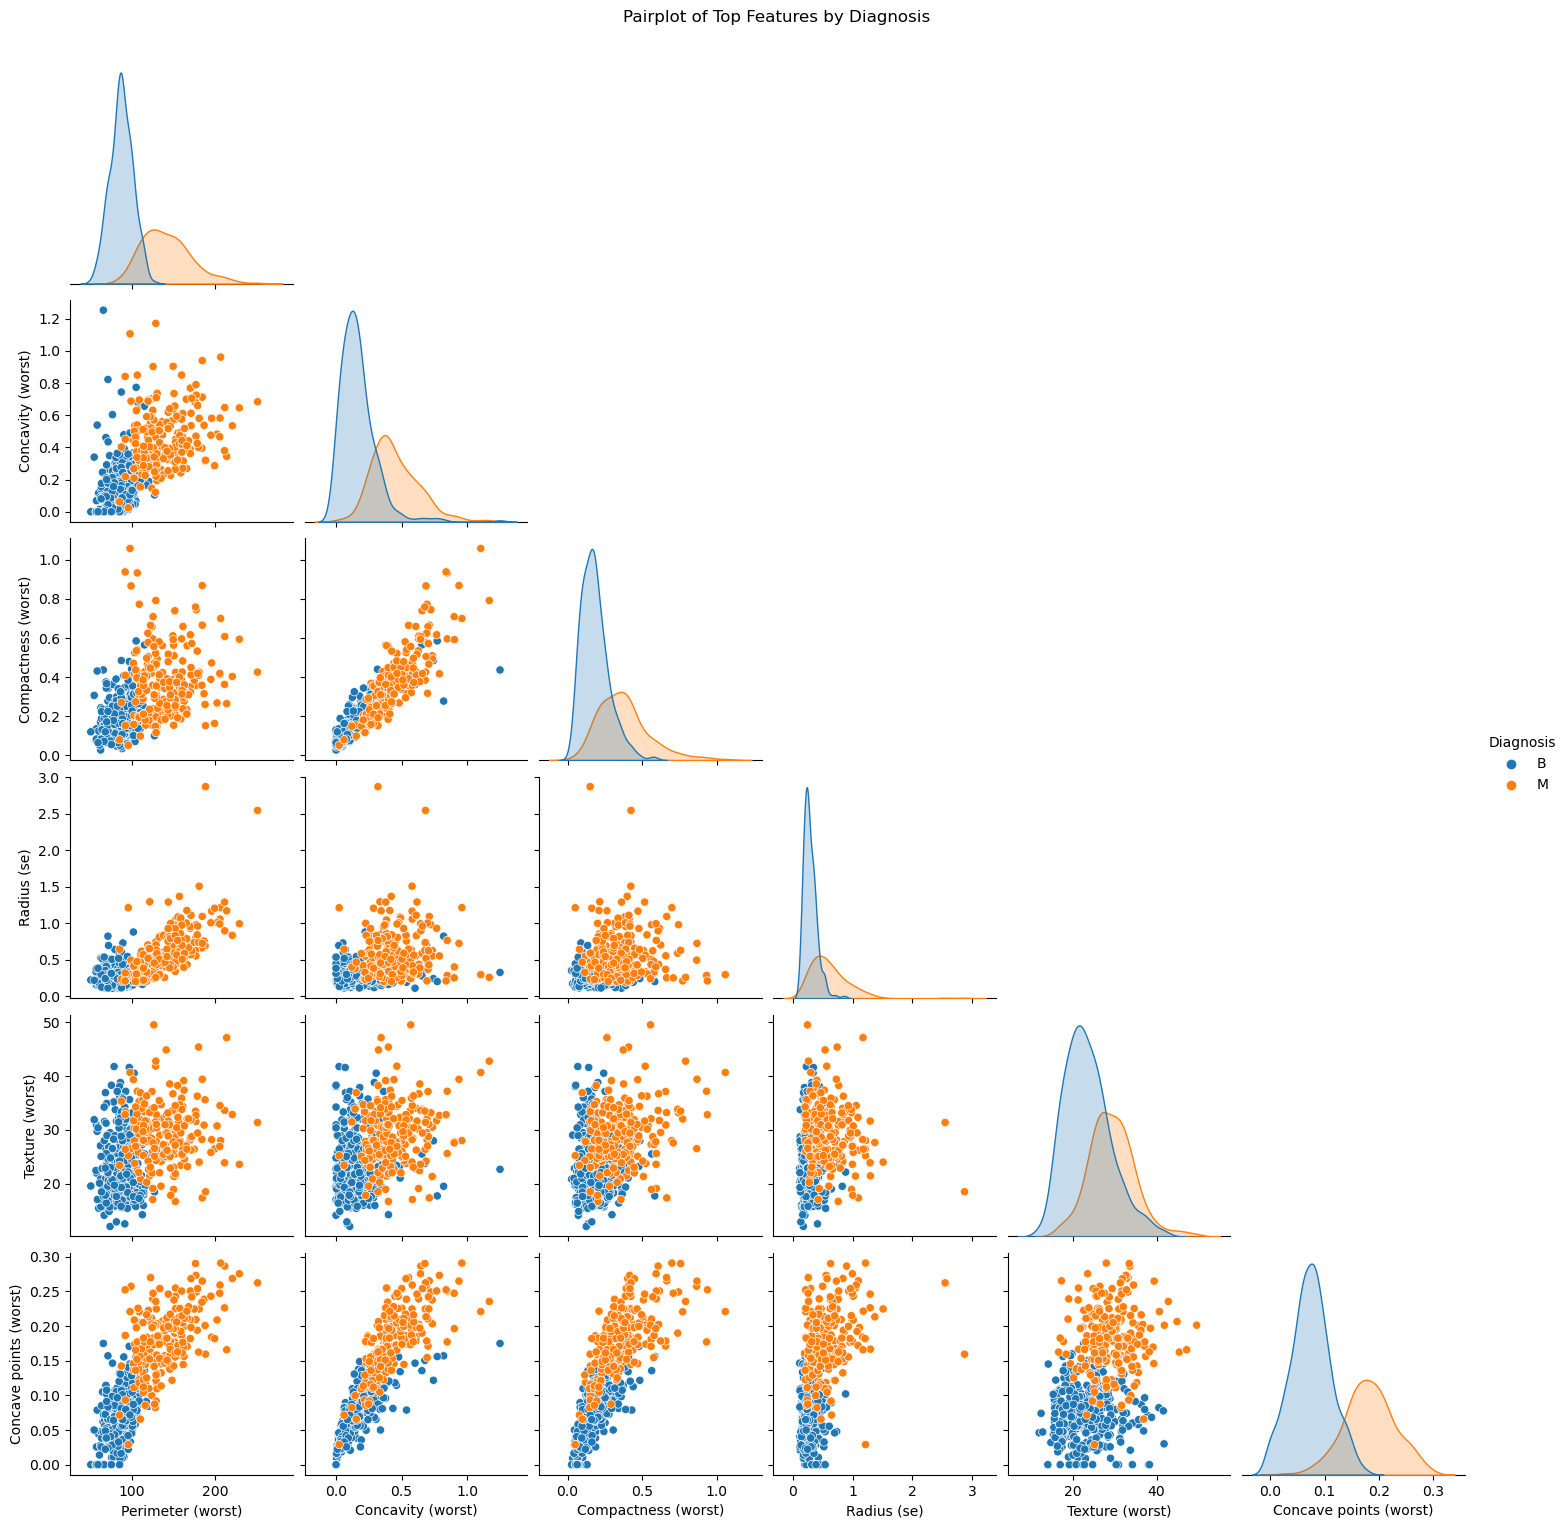

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
from collections import Counter

#setting the structure
import logging
logging.basicConfig(
    level=logging.INFO,
    format='[%(levelname)s] %(message)s'
)

#importing data
def read_data(filepath):
    return pd.read_csv(filepath)
                       
#display basic information about dataset

def preprocess_data(df):
    df['Diagnosis_binary'] = df['Diagnosis'].map({'M':1, 'B':0})
    return df

logging.info('Basic information about dataset')

def basic_info(df):
    print(df.info())
    print(df.head())

#features correlating with malignancy
def correlations(df):
    df_cleaned = df.drop(columns=['Id', 'Diagnosis'])
    correlations = df_cleaned.corr()
    diagnosis_corr = correlations['Diagnosis_binary'].drop('Diagnosis_binary')
    sorted_correlations = diagnosis_corr.sort_values(ascending=False)
    logging.info("="*80)
    logging.info("Top correlated features with malignancy")
    logging.info("\n%s", sorted_correlations.head(5).to_string())
    logging.info("="*80)
    logging.info("Least correlated features with malignancy")
    logging.info("\n%s", sorted_correlations.tail(5).to_string())
    logging.info("="*80)
    return sorted_correlations


#visualizing separation
def boxplot_correlations(df):
    sns.boxplot(x='Diagnosis', y='Concave points (worst)', data=df)
    plt.show()

#correlation matrix between most correlated features
def correlation_matrix(df):
    corr_matrix = df.drop(columns=['Id', 'Diagnosis']).corr()
    return corr_matrix

#calculating pairs with correlation >0.9
def pairs_high_correlation(corr_matrix, diagnosis_corr, threshold=0.9):
    high_correlation_pairs = []
    columns = corr_matrix.columns
    for i in range(len(columns)):
                   for j in range(i+1, len(columns)):
                         feature_1 = columns[i]
                         feature_2 = columns[j]
                         corr_value = corr_matrix.iloc[i, j]
                         if abs(corr_value) > threshold:
                           high_correlation_pairs.append([feature_1, feature_2, corr_value])
    high_corr_pairs_sorted = sorted(high_correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    features_to_drop = set()
    for f1, f2, _ in high_correlation_pairs:
        if f1 in features_to_drop or f2 in features_to_drop:
            continue
        if abs(diagnosis_corr.get(f1, 0)) >= abs(diagnosis_corr.get(f2, 0)):
            features_to_drop.add(f2)
        else:
            features_to_drop.add(f1)
    
    logging.info(f"Dropping {len(features_to_drop)} redundant features due to high correlation:")
    logging.info(sorted(features_to_drop))
    logging.info("Top correlated pairs: %s", high_corr_pairs_sorted[:5])

    return features_to_drop
    
#reduced feature set
def reduced_n_features(df, features_to_drop):
    X = df.drop(columns=['Id', 'Diagnosis', 'Diagnosis_binary'] + list(features_to_drop))
    y = df['Diagnosis_binary']
    return X, y
        
#visualizing highly correlated pairs
def visualize_high_correlation(X):
    corr_matrix_short = X.corr()
    mask = np.tril(np.ones_like(corr_matrix_short, dtype=bool))
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix_short, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title("Upper Triangle of Correlation Matrix")
    plt.tight_layout()
    plt.show()

#ranking features by importance using logistic regression
#preparing dataset
#X = df.drop(columns=['Id', 'Diagnosis', 'Diagnosis_binary'] + list(features_to_drop))
#y = df['Diagnosis_binary']
#standardizing features
def scaling_feature(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    return X_scaled, X_scaled_df, scaler

#train/test split
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

#define parameter grid for regularization tuning
def logreg_model(X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1):
    param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']}
    logreg = LogisticRegression(max_iter=1000)
    grid = GridSearchCV(logreg, param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs)
    grid.fit(X_train, y_train)
    logging.info("Logistic Regression training complete. Best params: %s", grid.best_params_)
    return grid

#evaluate on test set
def evaluate_test_set(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    logging.info("Classification Report:")
    logging.info("\n%s", classification_report(y_test, y_pred))
    logging.info("ROC AUC Score: %.4f", roc_auc_score(y_test, y_prob))
    return y_pred, y_prob

#get feature importances (absolute coefficients)
def feature_importance_abs_coef(best_model, X):
    feature_importance = pd.Series(best_model.coef_[0], index=X.columns).abs().sort_values(ascending=False)
    top_features = feature_importance.head(5).index.tolist()
    lr_coef = feature_importance[top_features].values
    logging.info("Top Features by Logistic Regression Importance:")
    logging.info("\n%s", feature_importance.head(5))
    return lr_coef, feature_importance, top_features

#visualize top features
def visualize_logreg(feature_importance, top_n=5):
    top_important_features = feature_importance.head(top_n)
    plt.barh(top_important_features.index, top_important_features.values)
    plt.xlabel("Absolute Coefficient (Importance)")
    plt.title("Top Features by Logistic Regression Importance")
    plt.tight_layout()
    plt.show()

#permutation
def logreg_permutation(top_features, best_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42):
    results_lr = permutation_importance(best_model, X_test, y_test, scoring=scoring, n_repeats=n_repeats, random_state=random_state)
    perm_importance_lr = pd.Series(results_lr.importances_mean, index=X_test.columns).sort_values(ascending=False)
    lr_perm_coef = perm_importance_lr[top_features].values
    logging.info("Top features by permutation importance / logistic regression:")
    logging.info("\n%s", perm_importance_lr.head(5))
    return perm_importance_lr, lr_perm_coef

#visualizing permutation
def visualize_perm_importance(perm_importance_lr, top_n=5):
    perm_importance_lr.head(top_n).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Permutation Importance / Logistic Regression")
    plt.xlabel("Mean Accuracy Drop When Shuffled")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

#applying random forest method on feature importance
from sklearn.ensemble import RandomForestClassifier

def random_forest_method(X_train, y_train, random_state=42):
    model_rf = RandomForestClassifier(random_state=random_state)
    model_rf.fit(X_train, y_train)
    importances_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    top_features = importances_rf.head(5).index.tolist()
    rf_coef = importances_rf[top_features].values
    logging.info("Top features by Random Forest importance:")
    logging.info("\n%s", importances_rf.head(5))
    return top_features, importances_rf, model_rf, rf_coef

#visualizing random forest
def visualize_rf(importances_rf, top_n_rf=5):
    top_important_features_rf=importances_rf.head(top_n_rf)
    plt.barh(top_important_features_rf.index[::1], top_important_features_rf.values)
    plt.title("Top Features by Random Forest Importance")
    plt.xlabel("Mean Decrease in Impurity (Feature Importance)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

#permutation
def permutation_rf(model_rf, X_test, y_test, top_features, scoring='accuracy', n_repeats=10, random_state=42):
    results_rf = permutation_importance(model_rf, X_test, y_test, scoring=scoring, n_repeats=n_repeats, random_state=random_state)
    perm_importance_rf = pd.Series(results_rf.importances_mean, index=X_test.columns).sort_values(ascending=False)
    rf_perm_coef = perm_importance_rf[top_features].values
    logging.info("Top features by permutation importance / random forest:")
    logging.info("\n%s", perm_importance_rf.head(5))
    return results_rf, perm_importance_rf, rf_perm_coef

#visualizing permutation
def visualize_perm_rf(perm_importance_rf, top_n=5):
    perm_importance_rf.head(top_n).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Permutation Importance / Random Forest")
    plt.xlabel("Decrease in Accuracy (Permutation Importance)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

#defining top features based on LR/RF/permutation
def top_features_final(lr_coef, lr_perm_coef, rf_coef, rf_perm_coef, top_n=5):
    data = {
    'Logistic Coef': lr_coef,
    'Logistic Permutation': lr_perm_coef,
    'RF Importance': rf_coef,
    'RF Permutation': rf_perm_coef
    }
    all_methods = {k: v.head(top_n).index.tolist() for k, v in data.items()}
    combined = [f for lst in all_methods.values() for f in lst]
    counts = Counter(combined)
    consensus = [f for f, c in counts.items() if c >= 2]
    rank_table = pd.DataFrame(index=lr_coef.index)
    for method, features in all_methods.items():
        rank_table[method] = [features.index(f) + 1 if f in features else None for f in lr_coef.index]
    
    rank_table = rank_table.dropna(how='all').sort_values(by=list(rank_table.columns))
    
    logging.info("Top %d Feature Importance Comparison:", top_n)
    logging.info("\n%s", rank_table)
    return {
        'top_features': all_methods,
        'consensus': consensus,
        'rank_table': rank_table
    }

#visualization
def visualize_final(rank_table):
    rank_table.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title("Stacked Feature Importance Across Models")
    plt.xlabel("Feature")
    plt.ylabel("Cumulative Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#visualizing using pairplot
def visualize_final_all_four(X, all_methods, hue='Diagnosis', corner=True, y=1.02):
    feature_list = list({f for lst in all_methods.values() for f in lst})
    pairplot_data = X[feature_list + [hue]]
    sns.pairplot(pairplot_data, hue=hue, corner=corner)
    plt.suptitle("Pairplot of Top Features by Diagnosis", y=y)
    plt.show()

def main():
    #load and preprocess
    df = read_data("cancer.csv")
    df = preprocess_data(df)
    basic_info(df)
    
    #correlation filtering
    sorted_corr = correlations(df)
    corr_matrix = correlation_matrix(df)
    features_to_drop = pairs_high_correlation(corr_matrix, sorted_corr)
    X, y = reduced_n_features(df, features_to_drop)

    #visualize correlation structure
    visualize_high_correlation(X)

    #scale, split
    _, X_df, _ = scaling_feature(X)
    X_train, X_test, y_train, y_test = split_data(X_df, y)

    #logistic regression
    logreg = logreg_model(X_train, y_train)
    best_model = logreg.best_estimator_
    y_pred, y_prob = evaluate_test_set(best_model, X_test, y_test)
    lr_coef, feature_importance, top_features = feature_importance_abs_coef(best_model, X_df)
    visualize_logreg(feature_importance)

    #permutation on LR
    perm_lr, lr_perm_coef = logreg_permutation(top_features, best_model, X_test, y_test)
    visualize_perm_importance(perm_lr)

    #random forest
    top_features_rf, rf_importance, model_rf, rf_coef = random_forest_method(X_train, y_train)
    visualize_rf(rf_importance)

    #permutation on RF
    _, perm_rf, rf_perm_coef = permutation_rf(model_rf, X_test, y_test, top_features_rf)
    visualize_perm_rf(perm_rf)

    #consensus features
    result = top_features_final(feature_importance, perm_lr, rf_importance, perm_rf)
    visualize_final(result['rank_table'])
    visualize_final_all_four(df, result['top_features'])

if __name__ == "__main__":
    main()

